# Классификация текстов

### Задания для выполнения
1) Загрузите датасет 20 newsgroups

2) Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.

3) Выведите информацию о количественных параметрах датасета;

4) Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);

5) Разделите эти данные на тестовую и обучающую выборки;

6) Постройте модель наивного байесовского для классификации текстов;

7) Оцените качество модели на тестовой выборке с помощью следующих метрик:

    - достоверность предсказания (accuracy);
    - точность (precision);
    - полнота (recall);
    
8) Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

9) Сделайте вывод о применимости модели.

##### Импортируем нужные библиотеки

In [3]:
import numpy as np
from pprint import pprint
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##### Загрузите датасет 20 newsgroups
##### Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.
##### Выведите информацию о количественных параметрах датасета;

In [4]:
news = fetch_20newsgroups(subset='all')
# print(news.DESCR)

##### Выведите несколько точек датасета (сами текстовые фрагменты и значение целевой переменной);

In [5]:
newsgroups_train = fetch_20newsgroups(subset='train')

In [6]:
text = newsgroups_train.data[0]
text

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [7]:
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


##### Разделите эти данные на тестовую и обучающую выборки;

In [8]:
categories = ['alt.atheism', 'talk.religion.misc', 
              'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train', 
                                      categories=categories) # y_train = newsgroups_train.target
newsgroups_test = fetch_20newsgroups(subset='test',
                                     categories=categories) # y_test = newsgroups_test.target

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data) # x_train
vectors_test = vectorizer.transform(newsgroups_test.data) # x_test

##### Постройте модель наивного байесовского для классификации текстов;

In [9]:
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target) # (x_train, y_train) Учим модель с помощью тренировочных данных
pred = clf.predict(vectors_test) # Берем модель и предсказываем на основе тестовых данных

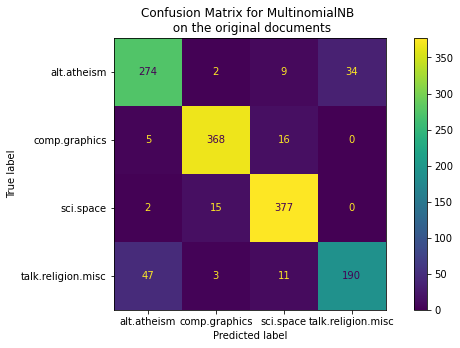

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(newsgroups_test.target, pred, ax=ax)
ax.xaxis.set_ticklabels(newsgroups_train.target_names)
ax.yaxis.set_ticklabels(newsgroups_train.target_names)
_ = ax.set_title(
    f"Confusion Matrix for MultinomialNB \n on the original documents"
)

##### Оцените качество модели на тестовой выборке с помощью следующих метрик:

- достоверность предсказания (accuracy);
- точность (precision);
- полнота (recall);

* ###### accuracy

In [12]:
metrics.accuracy_score(newsgroups_test.target, pred, )

0.893569844789357

* ##### precision

In [13]:
metrics.precision_score(newsgroups_test.target, pred, average='macro')

0.8862166693505817

* ##### recall

In [14]:
metrics.recall_score(newsgroups_test.target, pred, average='macro')

0.8796936242188698

* ##### f1

In [15]:
metrics.f1_score(newsgroups_test.target, pred, average='macro') # Берем цель по тестовым данным и сравниваем с предсказанными данными

0.8821359240272957

##### Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

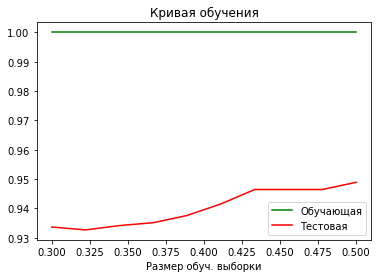

Wall time: 424 ms


In [16]:
%%time

size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(clf, vectors, newsgroups_train.target, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()

##### Сделайте вывод о применимости модели.

При учете, что мы имеем малый набор данных метрики, которые мы получили показывают что модель применима

### Дополнительные задания
1) Постройте модели классификации для данной задачи на основе следующих методов:

    - логистическая регрессия (LogisticRegression);
    - метод опорных векторов с гауссовым ядром (SVC);
    - метод опорных векторов с полиномиальным ядром (SVC);
    - метод k ближайших соседей (KNeighborsClassifier);
    - многослойный перцептрон (MLP);
    - другие методы по желанию;
    
2) Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;
    
3) Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.

4) Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.

##### Логистическая регрессия

In [17]:
logi = LogisticRegression(max_iter=10000)
logi.fit(vectors, newsgroups_train.target)
y_pred = logi.predict(vectors_test)

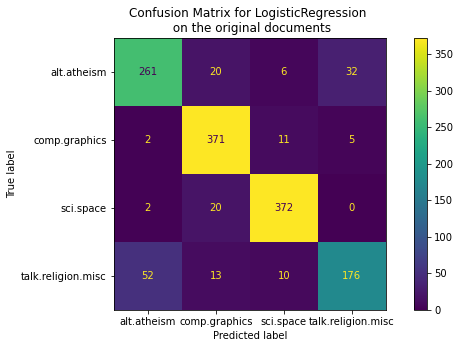

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(newsgroups_test.target, y_pred, ax=ax)
ax.xaxis.set_ticklabels(newsgroups_train.target_names)
ax.yaxis.set_ticklabels(newsgroups_train.target_names)
_ = ax.set_title(
    f"Confusion Matrix for LogisticRegression \n on the original documents"
)

In [19]:
print("accuracy_score: ", metrics.accuracy_score(newsgroups_test.target, y_pred, ))
print("precision_score: ", metrics.precision_score(newsgroups_test.target, y_pred, average='macro'))
print("recall_score: ", metrics.recall_score(newsgroups_test.target, y_pred, average='macro'))

accuracy_score:  0.8721359940872137
precision_score:  0.8642414388650793
recall_score:  0.8543167450700706


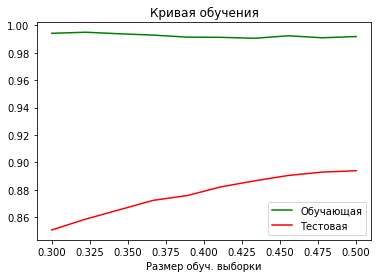

Wall time: 35.5 s


In [20]:
%%time

size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(logi, vectors, newsgroups_train.target, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()

##### метод опорных векторов с гауссовым ядром

In [21]:
svcgay = SVC(kernel='rbf')
svcgay.fit(vectors, newsgroups_train.target)
y_pred = svcgay.predict(vectors_test)

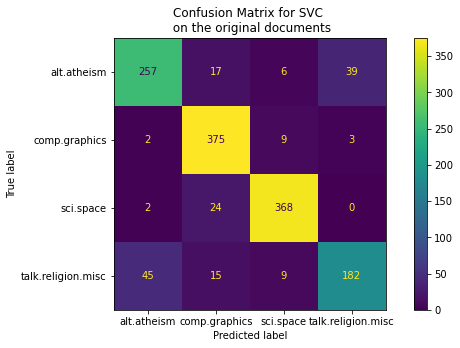

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(newsgroups_test.target, y_pred, ax=ax)
ax.xaxis.set_ticklabels(newsgroups_train.target_names)
ax.yaxis.set_ticklabels(newsgroups_train.target_names)
_ = ax.set_title(
    f"Confusion Matrix for SVC \n on the original documents"
)

In [23]:
print("accuracy_score: ", metrics.accuracy_score(newsgroups_test.target, y_pred, ))
print("precision_score: ", metrics.precision_score(newsgroups_test.target, y_pred, average='macro'))
print("recall_score: ", metrics.recall_score(newsgroups_test.target, y_pred, average='macro'))

accuracy_score:  0.8736141906873615
precision_score:  0.8653035992045697
recall_score:  0.8571906674707699


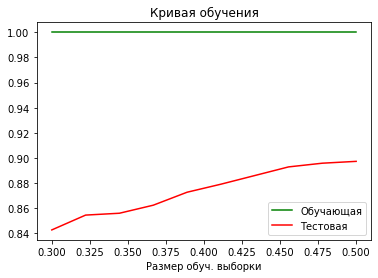

Wall time: 1min


In [24]:
%%time

size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(svcgay, vectors, newsgroups_train.target, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()

##### метод опорных векторов с полиномиальным ядром

In [25]:
svcpoly2 = SVC(kernel = 'poly', degree = 2)
svcpoly2.fit(vectors, newsgroups_train.target)
y_pred = svcpoly2.predict(vectors_test)

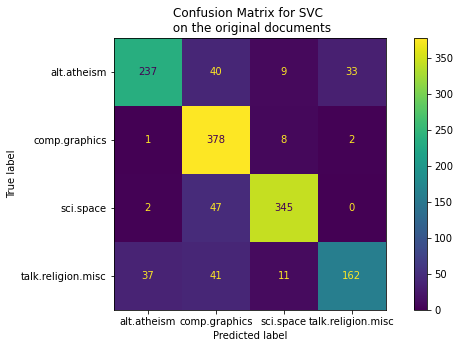

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(newsgroups_test.target, y_pred, ax=ax)
ax.xaxis.set_ticklabels(newsgroups_train.target_names)
ax.yaxis.set_ticklabels(newsgroups_train.target_names)
_ = ax.set_title(
    f"Confusion Matrix for SVC \n on the original documents"
)

In [27]:
print("accuracy_score: ", metrics.accuracy_score(newsgroups_test.target, y_pred, ))
print("precision_score: ", metrics.precision_score(newsgroups_test.target, y_pred, average='macro'))
print("recall_score: ", metrics.recall_score(newsgroups_test.target, y_pred, average='macro'))

accuracy_score:  0.8292682926829268
precision_score:  0.8374748105611475
recall_score:  0.8089304794905586


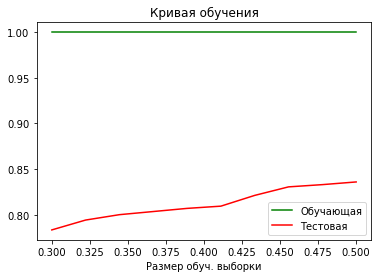

Wall time: 1min 1s


In [28]:
%%time

size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(svcpoly2, vectors, newsgroups_train.target, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()

##### метод k ближайших соседей

In [94]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(vectors, newsgroups_train.target)
y_pred = classifier.predict(vectors_test)

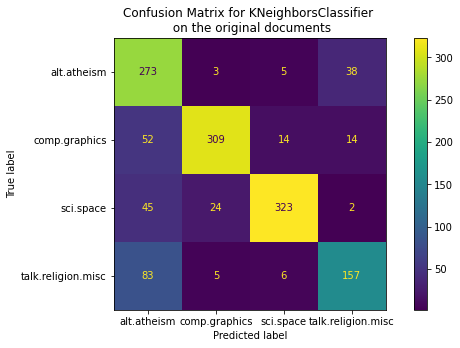

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(newsgroups_test.target, y_pred, ax=ax)
ax.xaxis.set_ticklabels(newsgroups_train.target_names)
ax.yaxis.set_ticklabels(newsgroups_train.target_names)
_ = ax.set_title(
    f"Confusion Matrix for KNeighborsClassifier \n on the original documents"
)

In [97]:
print("accuracy_score: ", metrics.accuracy_score(newsgroups_test.target, y_pred, ))
print("precision_score: ", metrics.precision_score(newsgroups_test.target, y_pred, average='macro'))
print("recall_score: ", metrics.recall_score(newsgroups_test.target, y_pred, average='macro'))

accuracy_score:  0.7849223946784922
precision_score:  0.7952610283294734
recall_score:  0.7738597020828282


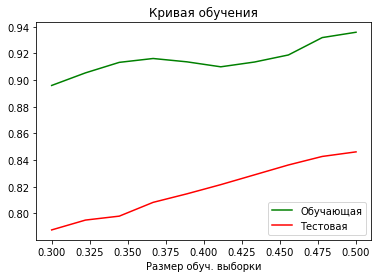

Wall time: 6.97 s


In [98]:
%%time

size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(classifier, vectors, newsgroups_train.target, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()

##### многослойный перцептрон

In [101]:
clmlp = MLPClassifier(random_state = 1, max_iter = 3000)
clmlp.fit(vectors, newsgroups_train.target)
y_pred = clmlp.predict(vectors_test)

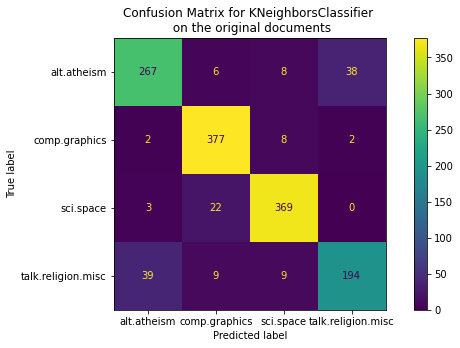

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(newsgroups_test.target, y_pred, ax=ax)
ax.xaxis.set_ticklabels(newsgroups_train.target_names)
ax.yaxis.set_ticklabels(newsgroups_train.target_names)
_ = ax.set_title(
    f"Confusion Matrix for KNeighborsClassifier \n on the original documents"
)

In [103]:
print("accuracy_score: ", metrics.accuracy_score(newsgroups_test.target, y_pred, )) # 
print("precision_score: ", metrics.precision_score(newsgroups_test.target, y_pred, average='macro')) # 
print("recall_score: ", metrics.recall_score(newsgroups_test.target, y_pred, average='macro')) # доля предсказанных больных

accuracy_score:  0.8920916481892092
precision_score:  0.8836892430138245
recall_score:  0.8788997141116401


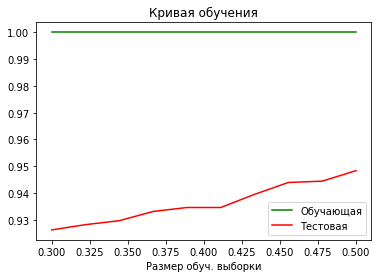

Wall time: 47min 21s


In [105]:
%%time

size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(clmlp, vectors, newsgroups_train.target, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()